In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
airs=pd.read_csv(r"C:\Users\Karthick\Documents\Airline+Passenger+Satisfaction\airline_passenger_satisfaction.csv")
airs

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
airs.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
airs.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [5]:
airs.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
airs.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [7]:
airs.shape

(129880, 24)

In [8]:
# missing values
airs.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [9]:
airs=airs.rename(columns={"Arrival Delay":"Arrival_Delay"})
airs=airs.rename(columns={"Flight Distance":"Flight_Distance"})
airs=airs.rename(columns={"Departure and Arrival Time Convenience":"Departure_and_Arrival_Time_Convenience"})
airs=airs.rename(columns={"Ease of Online Booking":"Ease_of_Online_Booking"})
airs=airs.rename(columns={"Check-in Service":"Check_in_Service"})
airs=airs.rename(columns={"Online Boarding":"Online_Boarding"})
airs=airs.rename(columns={"Gate Location":"Gate_Location"})
airs=airs.rename(columns={"On-board Service":"On_board_Service"})
airs=airs.rename(columns={"Leg Room Service":"Leg_Room_Service"})
airs=airs.rename(columns={"Food and Drink":"Food_and_Drink"})
airs=airs.rename(columns={"Departure Delay":"Departure_Delay"})
airs=airs.rename(columns={"In-flight Service":"In_flight_Service"})
airs=airs.rename(columns={"In-flight Wifi Service":"In_flight_Wifi_Service"})
airs=airs.rename(columns={"In-flight Entertainment":"In_flight_Entertainment"})
airs=airs.rename(columns={"Baggage Handling":"Baggage_Handling"})
airs=airs.rename(columns={"Seat Comfort":"Seat_Comfort"})
airs=airs.rename(columns={"Customer Type":"Customer_Type"})
airs=airs.rename(columns={"Type of Travel":"Type_of_travel"})

In [10]:
airs.Arrival_Delay.value_counts()

Arrival_Delay
0.0       72753
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
1011.0        1
386.0         1
624.0         1
355.0         1
412.0         1
Name: count, Length: 472, dtype: int64

In [11]:
airs.Arrival_Delay=airs.Arrival_Delay.fillna(airs.Arrival_Delay.median())

In [12]:
airs.Arrival_Delay.value_counts()

Arrival_Delay
0.0       73146
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
1011.0        1
386.0         1
624.0         1
355.0         1
412.0         1
Name: count, Length: 472, dtype: int64

In [13]:
# Target Variable
airs.Satisfaction.value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

In [14]:
airs.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer_Type                              object
Type_of_travel                             object
Class                                      object
Flight_Distance                             int64
Departure_Delay                             int64
Arrival_Delay                             float64
Departure_and_Arrival_Time_Convenience      int64
Ease_of_Online_Booking                      int64
Check_in_Service                            int64
Online_Boarding                             int64
Gate_Location                               int64
On_board_Service                            int64
Seat_Comfort                                int64
Leg_Room_Service                            int64
Cleanliness                                 int64
Food_and_Drink                              int64
In_flight_Service                           int64


# Data Type Conversion

In [15]:
le=LabelEncoder()

In [16]:
airs.Gender=le.fit_transform(airs.Gender)
airs.Customer_Type=le.fit_transform(airs.Customer_Type)
airs.Type_of_travel=le.fit_transform(airs.Type_of_travel)
airs.Class=le.fit_transform(airs.Class)
airs.Satisfaction=le.fit_transform(airs.Satisfaction)

In [17]:
airs.dtypes

ID                                          int64
Gender                                      int32
Age                                         int64
Customer_Type                               int32
Type_of_travel                              int32
Class                                       int32
Flight_Distance                             int64
Departure_Delay                             int64
Arrival_Delay                             float64
Departure_and_Arrival_Time_Convenience      int64
Ease_of_Online_Booking                      int64
Check_in_Service                            int64
Online_Boarding                             int64
Gate_Location                               int64
On_board_Service                            int64
Seat_Comfort                                int64
Leg_Room_Service                            int64
Cleanliness                                 int64
Food_and_Drink                              int64
In_flight_Service                           int64


In [18]:
airs.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

In [19]:
airs=airs.drop(["ID"],axis=1)

In [20]:
airs.Satisfaction.value_counts()

Satisfaction
0    73452
1    56428
Name: count, dtype: int64

# Model Building

In [21]:
x=airs.iloc[:,:-1]
y=airs.iloc[:,-1]

In [22]:
x.head(2)
y.head(2)

0    0
1    1
Name: Satisfaction, dtype: int32

In [23]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [24]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((103904, 22), (25976, 22), (103904,), (25976,))

# Logistic Regression

In [25]:
lg=LogisticRegression()

In [26]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [27]:
lg_p=lg.predict(x_te)
lg_p

array([0, 1, 0, ..., 1, 0, 1])

In [28]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[0.93534925, 0.06465075],
       [0.08086403, 0.91913597],
       [0.58280991, 0.41719009],
       ...,
       [0.29957124, 0.70042876],
       [0.50589996, 0.49410004],
       [0.33188012, 0.66811988]])

In [29]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[11404,  2343],
       [ 3295,  8934]], dtype=int64)

In [30]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

78.29534955343394

In [31]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80     13747
           1       0.79      0.73      0.76     12229

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.78      0.78      0.78     25976



In [32]:
#tpr=tp/(tp+fn)
tpr=11404/(11404+3295)
tpr

0.7758350908225049

In [33]:
#fpr=fp/(fp+tn)
fpr=2343/(2343+8934)
fpr

0.2077680234104815

In [34]:
#precision=tp/(tp+fp)
precision=11404/(11404+2343)
precision

0.8295628137048083

In [35]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score=(2*(precision*tpr))/(precision+tpr)
f1score

0.801799901567883

# AUC-ROC Curve

In [36]:
roc=roc_auc_score(lg_p,y_te)
roc

0.7800606610841484

In [37]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.935349,0.064651
1,0.080864,0.919136
2,0.582810,0.417190
3,0.092772,0.907228
4,0.912802,0.087198
...,...,...
25971,0.419134,0.580866
25972,0.073198,0.926802
25973,0.299571,0.700429
25974,0.505900,0.494100


In [38]:
fpr0,tpr0,thrshold=roc_curve(y_te,df.iloc[:,1])

In [39]:
fpr0

array([0.00000000e+00, 6.80318389e-05, 6.80318389e-05, ...,
       9.99659841e-01, 1.00000000e+00, 1.00000000e+00])

In [40]:
tpr0

array([0.00000000e+00, 0.00000000e+00, 8.86760663e-05, ...,
       9.99822648e-01, 9.99822648e-01, 1.00000000e+00])

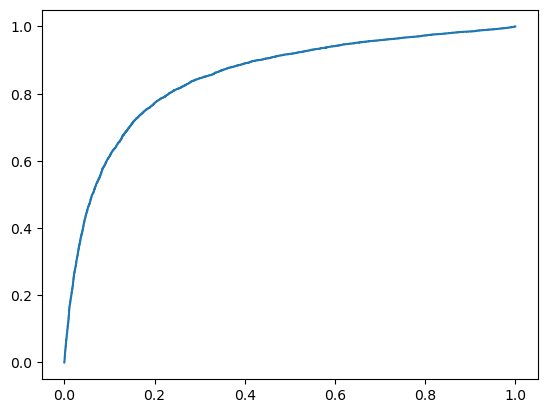

In [41]:
plt.plot(fpr0,tpr0)

# Precision Recall Curve

In [42]:
precision0,recall,threshold=precision_recall_curve(y_te,df.iloc[:,1])

In [43]:
precision0

array([0.43413151, 0.43410972, 0.43408793, ..., 0.5       , 0.        ,
       1.        ])

In [44]:
recall

array([1.00000000e+00, 9.99911324e-01, 9.99822648e-01, ...,
       8.86760663e-05, 0.00000000e+00, 0.00000000e+00])

Text(0.5, 1.0, 'Precision-Recall')

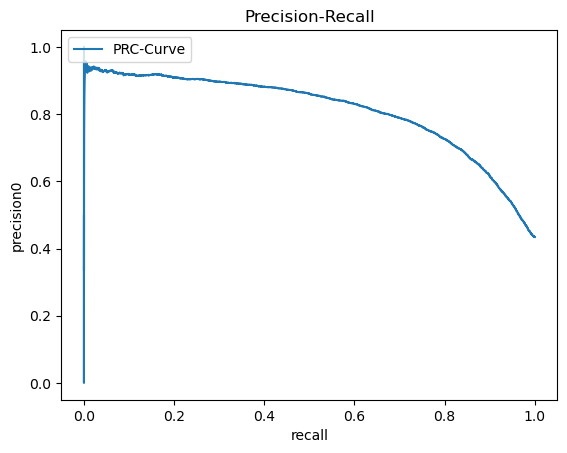

In [45]:
plt.plot(recall,precision0,label="PRC-Curve")
plt.xlabel("recall")
plt.ylabel("precision0")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

# Decision Tree

In [46]:
dt=DecisionTreeClassifier()

In [47]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [48]:
dt_p=dt.predict(x_te)
dt_p

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[13948,   611],
       [  751, 10666]], dtype=int64)

In [50]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

94.75669849091469

In [51]:
dt.feature_importances_

array([0.00241452, 0.02112363, 0.0414682 , 0.14719759, 0.02208082,
       0.02440961, 0.00869443, 0.00875757, 0.00545428, 0.00458104,
       0.02709996, 0.36170296, 0.02105594, 0.00849661, 0.01533323,
       0.01182044, 0.00952126, 0.00391166, 0.01537263, 0.17787398,
       0.04705753, 0.01457209])

In [52]:
dt_df=pd.DataFrame({"Importances":list(dt.feature_importances_),"Columns":list(x)})
dt_df

,Importances,Columns
0,0.002415,Gender
1,0.021124,Age
2,0.041468,Customer_Type
3,0.147198,Type_of_travel
4,0.022081,Class
5,0.024410,Flight_Distance
6,0.008694,Departure_Delay
7,0.008758,Arrival_Delay
8,0.005454,Departure_and_Arrival_Time_Convenience
9,0.004581,Ease_of_Online_Booking


In [53]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14559
           1       0.95      0.93      0.94     11417

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [54]:
#tpr=tp/(tp+fn)
tpr1=13943/(13943+756)
tpr1

0.9485679297911422

In [55]:
#fpr=fp/(fp+tn)
fpr1=617/(617+10660)
fpr1

0.05471313292542343

In [56]:
#precision=tp/(tp+fp)
precision1=13943/(13943+617)
precision1

0.9576236263736264

In [57]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score1=(2*(precision1*tpr1))/(precision1+tpr1)
f1score1

0.9530742677466763

# Random Forest

In [58]:
rf=RandomForestClassifier()

In [59]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [60]:
rf_p=rf.predict(x_te)
rf_p

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
rf_m=confusion_matrix(rf_p,y_te)
rf_m

array([[14379,   635],
       [  320, 10642]], dtype=int64)

In [62]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

96.32352941176471

In [63]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     15014
           1       0.94      0.97      0.96     10962

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [64]:
#tpr=tp/(tp+fn)
tpr2=14377/(14377+322)
tpr2

0.978093747874005

In [65]:
#fpr=fp/(fp+tn)
fpr2=624/(624+10653)
fpr2

0.05533386538973131

In [66]:
#precision=tp/(tp+fp)
precision2=14377/(14377+624)
precision2

0.9584027731484568

In [67]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score2=(2*(precision2*tpr2))/(precision2+tpr2)
f1score2

0.9681481481481482

# KNN

In [68]:
knn=KNeighborsClassifier(n_neighbors=25)

In [69]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [70]:
knn_p=knn.predict(x_te)

In [71]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[12168,  4109],
       [ 2531,  7168]], dtype=int64)

In [72]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

74.43794271635356

In [73]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     16277
           1       0.64      0.74      0.68      9699

    accuracy                           0.74     25976
   macro avg       0.73      0.74      0.73     25976
weighted avg       0.76      0.74      0.75     25976



In [74]:
lst=list()

In [75]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    knp=knn.predict(x_te)
    c=confusion_matrix(knp,y_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

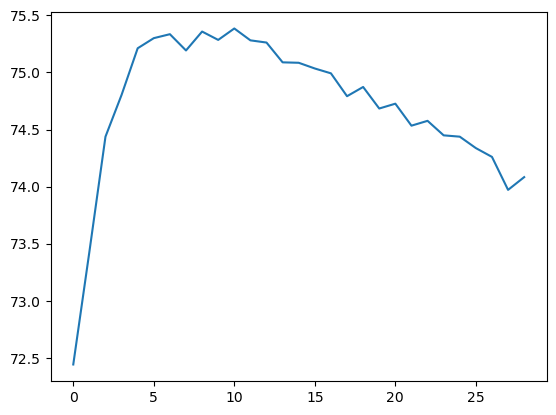

In [76]:
p=plt.plot(lst)

In [77]:
#tpr=tp/(tp+fn)
tpr3=12168/(12168+2531)
tpr3

0.8278114157425676

In [78]:
#fpr=fp/(fp+tn)
fpr3=4109/(4109+7168)
fpr3

0.3643699565487275

In [79]:
#precision=tp/(tp+fp)
precision3=12168/(12168+4109)
precision3

0.7475579037906248

In [80]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score3=(2*(precision3*tpr3))/(precision3+tpr3)
f1score3

0.7856404958677686

# Naive Bayes

In [81]:
nb=MultinomialNB()

In [82]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [83]:
nb_p=nb.predict(x_te)
nb_p

array([0, 1, 1, ..., 1, 1, 1])

In [84]:
nb_m=confusion_matrix(nb_p,y_te)
nb_m

array([[9137, 4596],
       [5562, 6681]], dtype=int64)

In [85]:
nb_acc=nb_m.diagonal().sum()/nb_m.sum()*100
nb_acc

60.89467200492763

In [86]:
print(classification_report(nb_p,y_te))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64     13733
           1       0.59      0.55      0.57     12243

    accuracy                           0.61     25976
   macro avg       0.61      0.61      0.61     25976
weighted avg       0.61      0.61      0.61     25976



In [87]:
#tpr=tp/(tp+fn)
tpr4=9137/(9137+5562)
tpr4

0.6216069120348323

In [88]:
#fpr=fp/(fp+tn)
fpr4=4596/(4596+6681)
fpr4

0.4075552008512902

In [89]:
#precision=tp/(tp+fp)
precision4=9137/(9137+4596)
precision4

0.6653316828078352

In [90]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score4=(2*(precision4*tpr4))/(precision4+tpr4)
f1score4

0.642726505346089

# Support Vector Machine (SVM)

In [91]:
svc=SVC()

In [92]:
svc.fit(x_tr,y_tr)

SVC()

In [93]:
svc_p=svc.predict(x_te)

In [94]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[12369,  6116],
       [ 2330,  5161]], dtype=int64)

In [95]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100
svc_acc

67.4853711117955

In [96]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75     18485
           1       0.46      0.69      0.55      7491

    accuracy                           0.67     25976
   macro avg       0.65      0.68      0.65     25976
weighted avg       0.73      0.67      0.69     25976



In [97]:
#tpr=tp/(tp+fn)
tpr5=12369/(12369+2330)
tpr5

0.8414858153615892

In [98]:
#fpr=fp/(fp+tn)
fpr5=6116/(6116+5161)
fpr5

0.5423428216724306

In [99]:
#precision=tp/(tp+fp)
precision5=12369/(12369+6116)
precision5

0.6691371382201785

In [100]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score5=(2*(precision5*tpr5))/(precision5+tpr5)
f1score5

0.7454797492767599

# ADABOOST

In [101]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [102]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [103]:
adbo_p=adbo.predict(x_te)

In [104]:
adbo_m=confusion_matrix(adbo_p,y_te)
adbo_m

array([[13954,   618],
       [  745, 10659]], dtype=int64)

In [105]:
adbo_acc=adbo_m.diagonal().sum()/adbo_m.sum()*100
adbo_acc

94.75284878349245

In [106]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14572
           1       0.95      0.93      0.94     11404

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [107]:
#tpr=tp/(tp+fn)
tpr6=13971/(13971+728)
tpr6

0.9504728212803593

In [108]:
#fpr=fp/(fp+tn)
fpr6=629/(629+10648)
fpr6

0.0557772457213798

In [109]:
#precision=tp/(tp+fp)
precision6=13971/(13971+629)
precision6

0.956917808219178

In [110]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score6=(2*(precision6*tpr6))/(precision6+tpr6)
f1score6

0.9536844260896277

# XGBOOST

In [111]:
xgb=XGBClassifier()

In [112]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [113]:
xgb_p=xgb.predict(x_te)

In [114]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[14341,   577],
       [  358, 10700]], dtype=int64)

In [115]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

96.40052356020942

In [116]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14918
           1       0.95      0.97      0.96     11058

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [117]:
#tpr=tp/(tp+fn)
tpr7=14341/(14341+358)
tpr7

0.9756446016735832

In [118]:
#fpr=fp/(fp+tn)
fpr7=577/(577+10700)
fpr7

0.05116609027223552

In [119]:
#precision=tp/(tp+fp)
precision7=14341/(14341+577)
precision7

0.9613218930151495

In [120]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score7=(2*(precision7*tpr7))/(precision7+tpr7)
f1score7

0.9684302934125671

# AUC-ROC Curve

In [349]:
roc1=roc_auc_score(xgb_p,y_te)
roc1

0.9644735708519409

In [350]:
fpr01,tpr01,threshold=roc_curve(y_te,xgb_p)

In [351]:
fpr01

array([0.       , 0.0243554, 1.       ])

In [352]:
tpr01

array([0.        , 0.94883391, 1.        ])

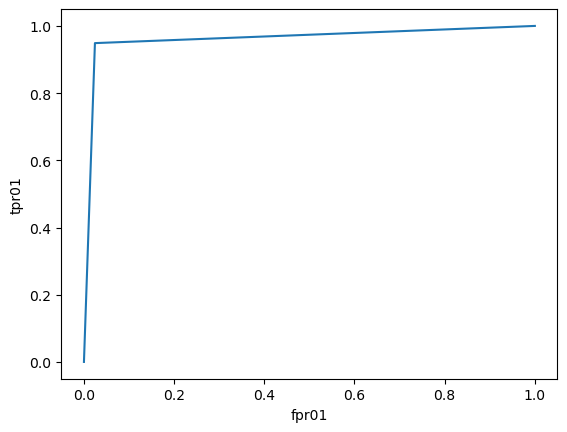

In [370]:
plt.xlabel("fpr01")
plt.ylabel("tpr01")
plt.plot(fpr01,tpr01)

In [123]:
# DF-1
l1=["log","dt","rf","knn","naive","svc","adaboost","xgboost"]
l2=[lg_acc,dt_acc,rf_acc,knn_acc,nb_acc,svc_acc,adbo_acc,xgb_acc]
l3=[fpr,fpr1,fpr2,fpr3,fpr4,fpr5,fpr6,fpr7]
l4=[tpr,tpr1,tpr2,tpr3,tpr4,tpr5,tpr6,tpr7]
l5=[f1score,f1score1,f1score3,f1score3,f1score4,f1score5,f1score6,f1score7]

In [124]:
final1=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final1

,Model_Name,accuracy,fpr,tpr,f1score
0,log,78.295350,0.207768,0.775835,0.801800
1,dt,94.756698,0.054713,0.948568,0.953074
2,rf,96.323529,0.055334,0.978094,0.785640
3,knn,74.437943,0.364370,0.827811,0.785640
4,naive,60.894672,0.407555,0.621607,0.642727
5,svc,67.485371,0.542343,0.841486,0.745480
6,adaboost,94.752849,0.055777,0.950473,0.953684
7,xgboost,96.400524,0.051166,0.975645,0.968430


# Class Imbalance

# Undersampling

In [126]:
s_0,s_1=airs["Satisfaction"].value_counts()
s_0,s_1

(73452, 56428)

In [127]:
air_0=airs[airs["Satisfaction"]==0]
air_1=airs[airs["Satisfaction"]==1]

In [128]:
air_0.shape,air_1.shape

((73452, 23), (56428, 23))

In [129]:
air_0under=air_0.sample(s_1)

In [130]:
air_0under.shape

(56428, 23)

In [131]:
air0_1=pd.concat([air_0under,air_1],axis=0)

In [132]:
air0_1.shape

(112856, 23)

In [133]:
#air0_1.head()

In [134]:
air0_1.Satisfaction.value_counts()

Satisfaction
0    56428
1    56428
Name: count, dtype: int64

In [135]:
x1=air0_1.iloc[:,:-1]
y1=air0_1.iloc[:,-1]

In [136]:
x1.shape,y1.shape

((112856, 22), (112856,))

In [137]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(x1,y1,test_size=0.2,random_state=100)

In [138]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((90284, 22), (22572, 22), (90284,), (22572,))

# Outliers

<Axes: >

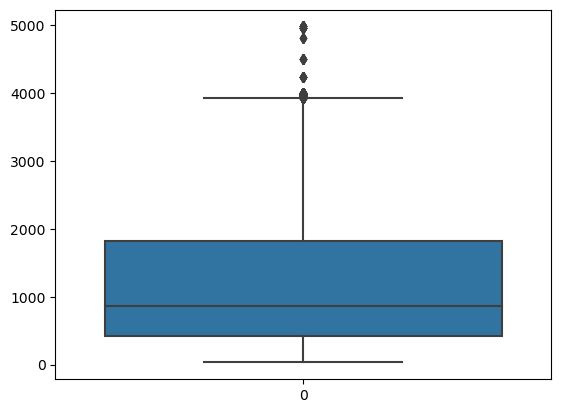

In [139]:
sns.boxplot(air0_1["Flight_Distance"])

<Axes: xlabel='Flight_Distance', ylabel='Density'>

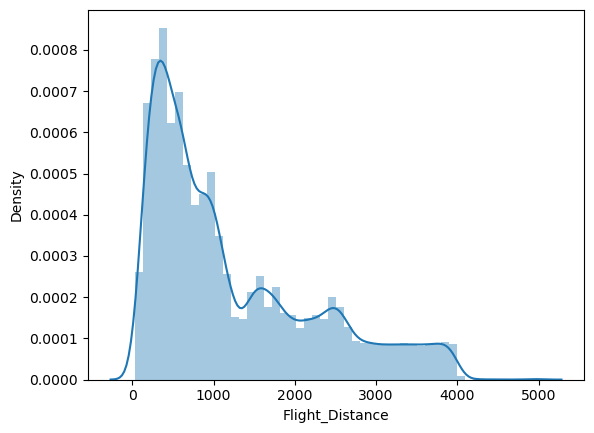

In [140]:
sns.distplot(air0_1["Flight_Distance"])

In [141]:
IQR=air0_1.Flight_Distance.quantile(0.75)-air0_1.Flight_Distance.quantile(0.25)
IQR

1402.0

In [142]:
lb=air0_1["Flight_Distance"].quantile(0.25)-IQR*3
ub=air0_1["Flight_Distance"].quantile(0.75)+IQR*3
lb,ub

(-3783.0, 6031.0)

In [143]:
air0_1.loc[air0_1["Flight_Distance"]>6037.0,"Flight_Distance"]=6037.0

<Axes: xlabel='Flight_Distance', ylabel='Density'>

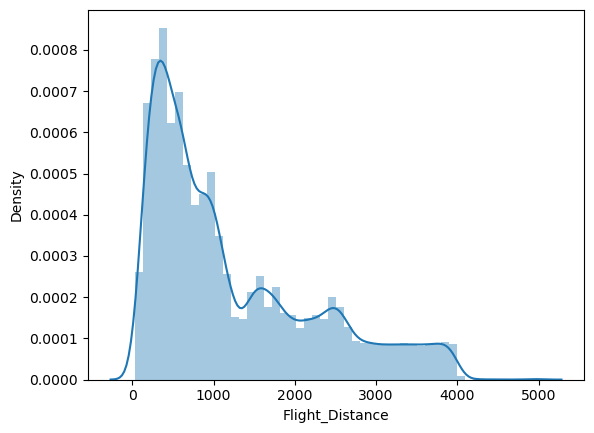

In [144]:
sns.distplot(air0_1["Flight_Distance"])

<Axes: >

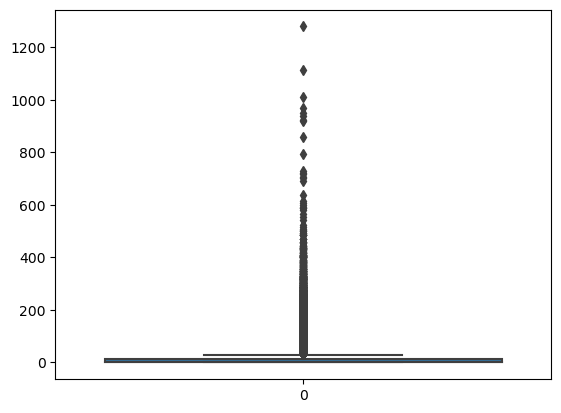

In [145]:
sns.boxplot(air0_1["Arrival_Delay"])

<Axes: xlabel='Arrival_Delay', ylabel='Density'>

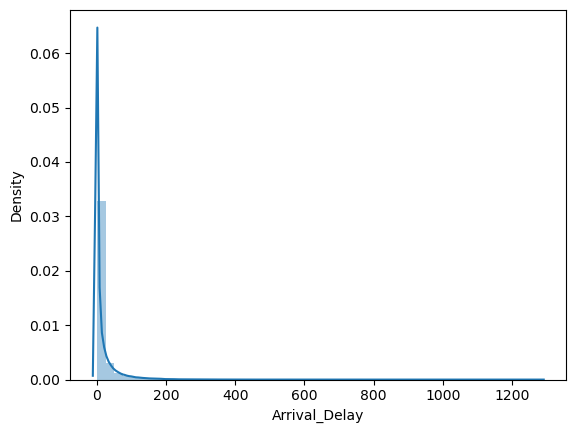

In [146]:
sns.distplot(air0_1["Arrival_Delay"])

In [147]:
IQR1=air0_1.Arrival_Delay.quantile(0.75)-air0_1.Arrival_Delay.quantile(0.25)
IQR1

12.0

In [148]:
lb1=air0_1["Arrival_Delay"].quantile(0.25)-IQR1*3
ub1=air0_1["Arrival_Delay"].quantile(0.75)+IQR1*3
lb1,ub1

(-36.0, 48.0)

In [149]:
air0_1.loc[air0_1["Arrival_Delay"]>48.0,"Arrival_Delay"]=48.0

<Axes: xlabel='Arrival_Delay', ylabel='Density'>

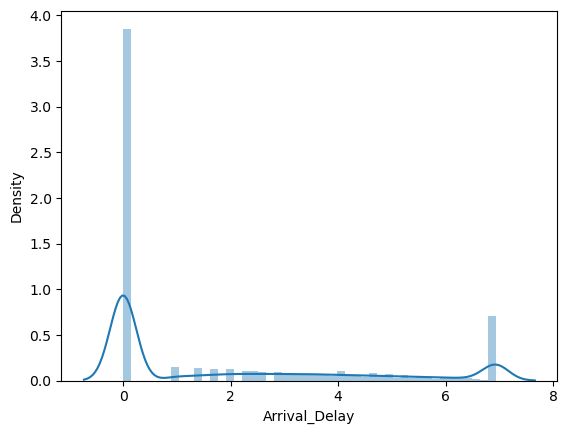

In [347]:
sns.distplot(air0_1["Arrival_Delay"])

<Axes: >

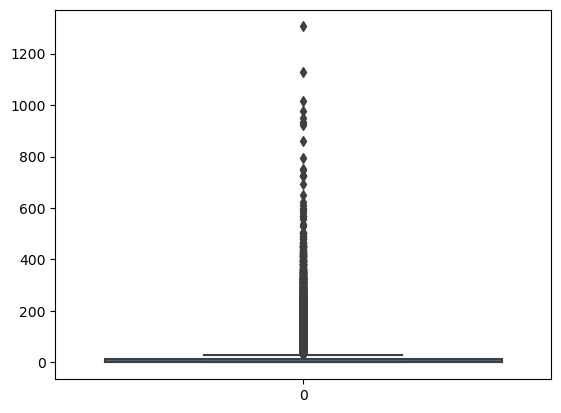

In [150]:
sns.boxplot(air0_1["Departure_Delay"])

<Axes: xlabel='Departure_Delay', ylabel='Density'>

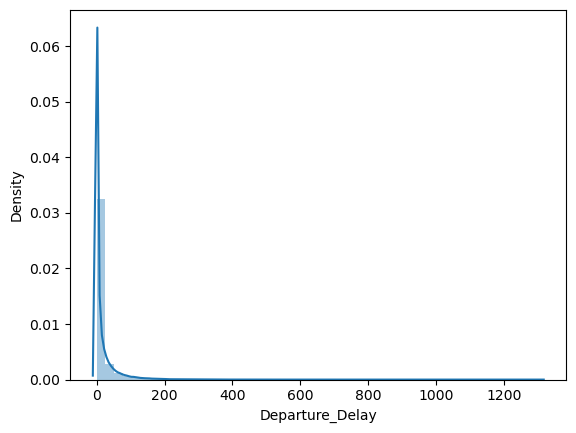

In [151]:
sns.distplot(air0_1["Departure_Delay"])

In [152]:
IQR2=air0_1.Departure_Delay.quantile(0.75)-air0_1.Departure_Delay.quantile(0.25)
IQR2

12.0

In [153]:
lb2=air0_1["Departure_Delay"].quantile(0.25)-IQR2*3
ub2=air0_1["Departure_Delay"].quantile(0.75)+IQR2*3
lb2,ub2

(-36.0, 48.0)

In [154]:
air0_1.loc[air0_1["Departure_Delay"]>48.0,"Arrival_Delay"]=48.0

<Axes: xlabel='Departure_Delay', ylabel='Density'>

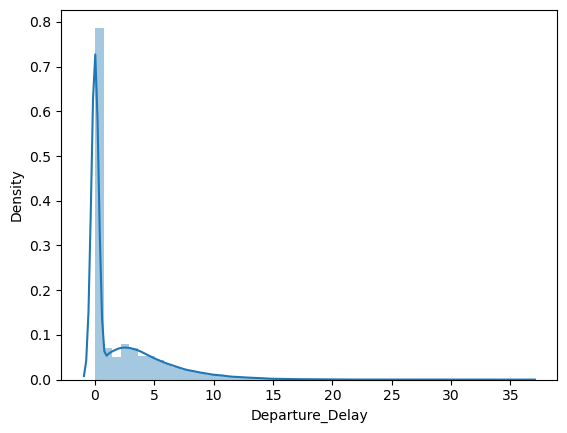

In [348]:
sns.distplot(air0_1["Departure_Delay"])

In [155]:
air0_1.skew()

Gender                                    0.025947
Age                                      -0.034085
Customer_Type                            -1.726441
Type_of_travel                            0.966888
Class                                     0.648949
Flight_Distance                           1.034463
Departure_Delay                           6.507698
Arrival_Delay                             1.583200
Departure_and_Arrival_Time_Convenience   -0.321417
Ease_of_Online_Booking                   -0.052925
Check_in_Service                         -0.397508
Online_Boarding                          -0.559884
Gate_Location                            -0.050852
On_board_Service                         -0.475000
Seat_Comfort                             -0.558403
Leg_Room_Service                         -0.409600
Cleanliness                              -0.355094
Food_and_Drink                           -0.189296
In_flight_Service                        -0.734783
In_flight_Wifi_Service         

In [156]:
air0_1.shape

(112856, 23)

In [157]:
a1=air0_1[air0_1.Flight_Distance>0]

In [158]:
a1.shape

(112856, 23)

In [159]:
air0_1["Flight_Distance"]=np.sqrt(air0_1["Flight_Distance"])

In [160]:
a2=air0_1[air0_1.Departure_Delay>0]

In [161]:
a2.shape

(48648, 23)

In [162]:
air0_1["Departure_Delay"]=np.sqrt(air0_1["Departure_Delay"])

In [163]:
a3=air0_1[air0_1.Arrival_Delay>0]

In [164]:
a3.shape

(48708, 23)

In [165]:
air0_1["Arrival_Delay"]=np.sqrt(air0_1["Arrival_Delay"])

In [166]:
air0_1.skew()

Gender                                    0.025947
Age                                      -0.034085
Customer_Type                            -1.726441
Type_of_travel                            0.966888
Class                                     0.648949
Flight_Distance                           0.481985
Departure_Delay                           1.963050
Arrival_Delay                             0.995944
Departure_and_Arrival_Time_Convenience   -0.321417
Ease_of_Online_Booking                   -0.052925
Check_in_Service                         -0.397508
Online_Boarding                          -0.559884
Gate_Location                            -0.050852
On_board_Service                         -0.475000
Seat_Comfort                             -0.558403
Leg_Room_Service                         -0.409600
Cleanliness                              -0.355094
Food_and_Drink                           -0.189296
In_flight_Service                        -0.734783
In_flight_Wifi_Service         

# Visualization

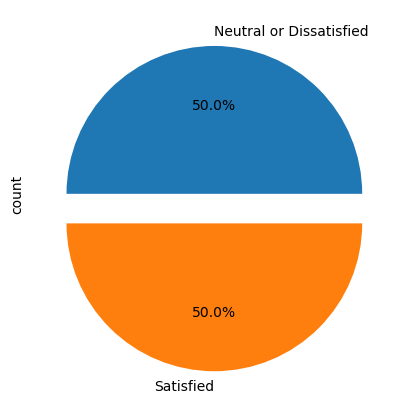

In [167]:
lb=["Neutral or Dissatisfied","Satisfied"]
air0_1["Satisfaction"].value_counts().plot.pie(autopct="%1.1f%%",explode=(0,0.2),labels=lb)
plt.show()

<Axes: xlabel='Satisfaction', ylabel='count'>

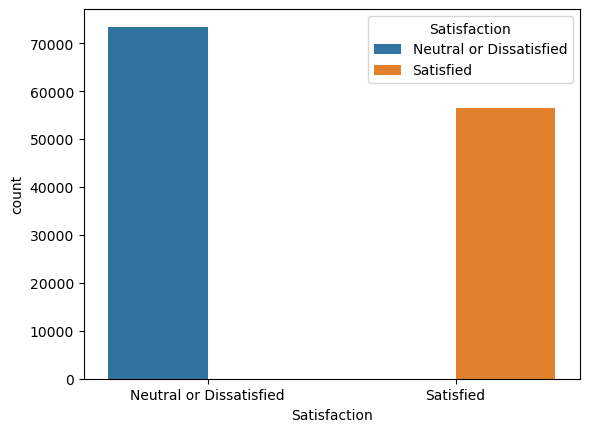

In [3]:
sns.countplot(x="Satisfaction",data=airs,hue="Satisfaction")

<Axes: xlabel='Satisfaction', ylabel='count'>

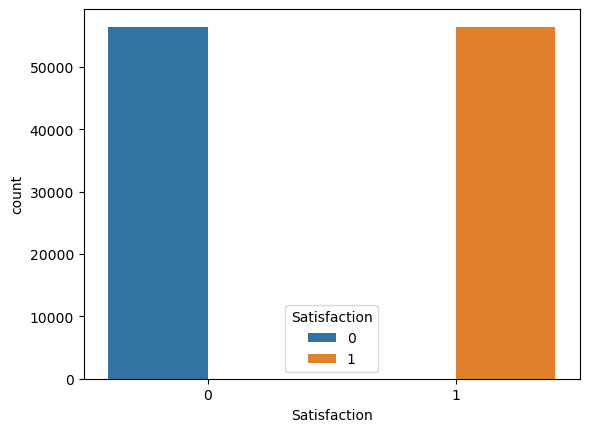

In [168]:
sns.countplot(x="Satisfaction",data=air0_1,hue="Satisfaction")

In [169]:
# The first two charts shows the Satisfaction of customers for travelling in plane

<Axes: xlabel='Flight_Distance', ylabel='Count'>

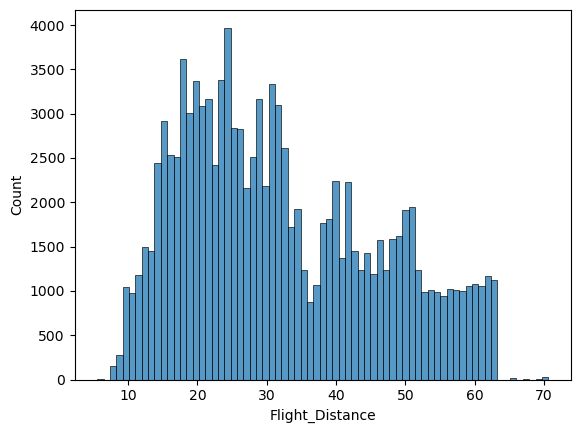

In [170]:
sns.histplot(data=air0_1,x="Flight_Distance")

In [171]:
# It shows the distance of flight according to km.

<Axes: xlabel='Departure_Delay'>

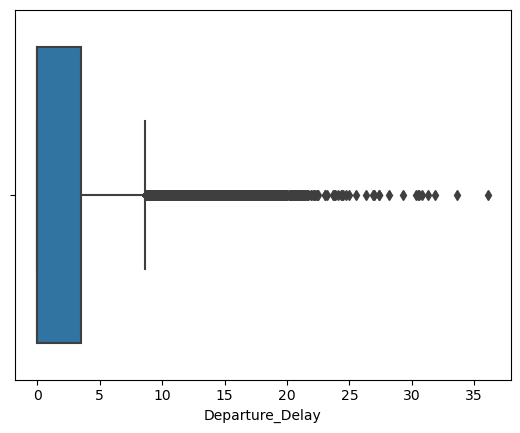

In [172]:
sns.boxplot(x="Departure_Delay",data=air0_1)

In [1]:
# This shows the delay of departure in minutes.

<Axes: ylabel='Arrival_Delay'>

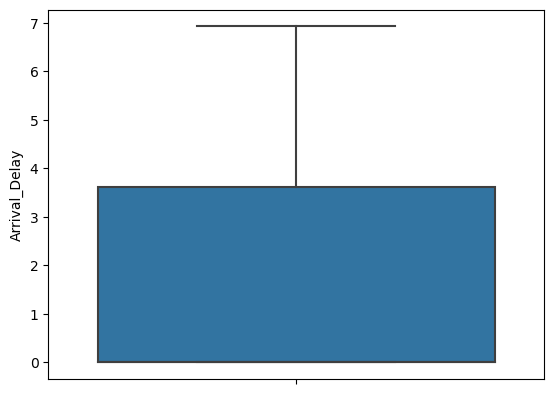

In [173]:
sns.boxplot(y="Arrival_Delay",data=air0_1)

In [2]:
# This shows the delay of arrival in minutes.

<Axes: xlabel='Class', ylabel='count'>

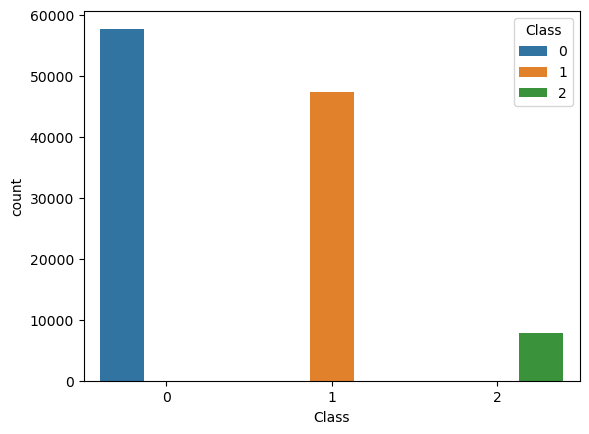

In [174]:
sns.countplot(x="Class",data=air0_1,hue="Class")

In [175]:
# It shows that there are three types of seats that people booked for travelling in flight.

<Axes: xlabel='Customer_Type', ylabel='count'>

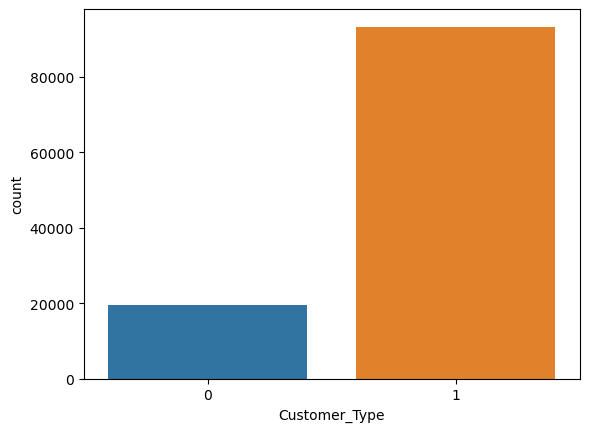

In [176]:
sns.countplot(x="Customer_Type",data=air0_1)

<Axes: xlabel='Type_of_travel', ylabel='count'>

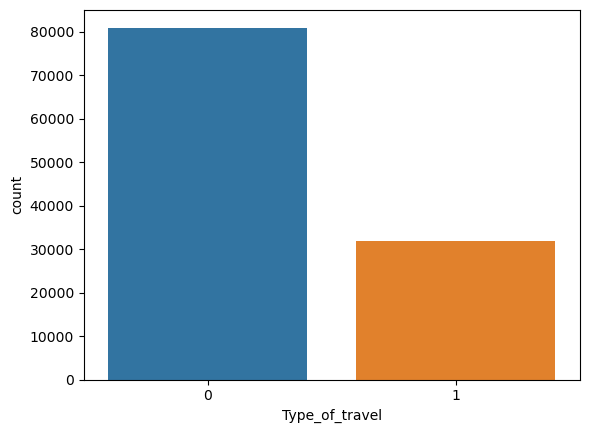

In [177]:
sns.countplot(x="Type_of_travel",data=air0_1)

In [3]:
# This shows the purpose of the flight of the passengers.

In [178]:
cor=air0_1.corr()
cor

,Gender,Age,Customer_Type,Type_of_travel,Class,Flight_Distance,Departure_Delay,Arrival_Delay,Departure_and_Arrival_Time_Convenience,Ease_of_Online_Booking,...,On_board_Service,Seat_Comfort,Leg_Room_Service,Cleanliness,Food_and_Drink,In_flight_Service,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
Gender,1.000000,0.008641,0.029227,0.008217,-0.011708,0.004102,0.001767,-0.000920,0.009012,0.006936,...,0.003855,-0.022933,0.023328,0.007570,0.005304,0.032576,0.005933,0.004795,0.030438,0.011024
Age,0.008641,1.000000,0.290808,-0.057176,-0.122092,0.087851,-0.008267,-0.009645,0.034471,0.016191,...,0.069342,0.164910,0.060983,0.055636,0.018682,-0.037673,0.012924,0.085585,-0.034138,0.137216
Customer_Type,0.029227,0.290808,1.000000,0.278711,-0.054801,0.222440,-0.006588,-0.009247,0.189714,0.005785,...,0.061413,0.174686,0.061045,0.096726,0.066353,-0.018928,-0.000377,0.126554,-0.019322,0.190940
Type_of_travel,0.008217,-0.057176,0.278711,1.000000,0.493129,-0.254226,-0.005688,-0.006679,0.244677,-0.124292,...,-0.082975,-0.146814,-0.154025,-0.104061,-0.079739,-0.043132,-0.103876,-0.177527,-0.052704,-0.466982
Class,-0.011708,-0.122092,-0.054801,0.493129,1.000000,-0.419170,0.008604,0.020946,0.084784,-0.087694,...,-0.230375,-0.224622,-0.217374,-0.139313,-0.081144,-0.179953,-0.010899,-0.196949,-0.188400,-0.453400
Flight_Distance,0.004102,0.087851,0.222440,-0.254226,-0.419170,1.000000,0.009726,-0.003553,-0.012085,0.062072,...,0.120177,0.162742,0.142723,0.102152,0.057997,0.074617,-0.001926,0.133247,0.079890,0.281376
Departure_Delay,0.001767,-0.008267,-0.006588,-0.005688,0.008604,0.009726,1.000000,0.806416,-0.001955,-0.007248,...,-0.035579,-0.026780,0.001167,-0.017459,-0.024503,-0.049121,-0.023181,-0.033616,-0.011154,-0.069952
Arrival_Delay,-0.000920,-0.009645,-0.009247,-0.006679,0.020946,-0.003553,0.806416,1.000000,-0.003461,-0.010572,...,-0.048341,-0.035334,-0.018998,-0.030921,-0.030014,-0.054153,-0.032481,-0.044401,-0.030579,-0.102011
Departure_and_Arrival_Time_Convenience,0.009012,0.034471,0.189714,0.244677,0.084784,-0.012085,-0.001955,-0.003461,1.000000,0.457942,...,0.061345,0.006994,0.010485,0.007521,-0.000307,0.065976,0.377153,-0.008155,0.064469,-0.054688
Ease_of_Online_Booking,0.006936,0.016191,0.005785,-0.124292,-0.087694,0.062072,-0.007248,-0.010572,0.457942,1.000000,...,0.046783,0.027793,0.110213,0.017863,0.031067,0.043414,0.728671,0.050521,0.046726,0.167073


<Axes: >

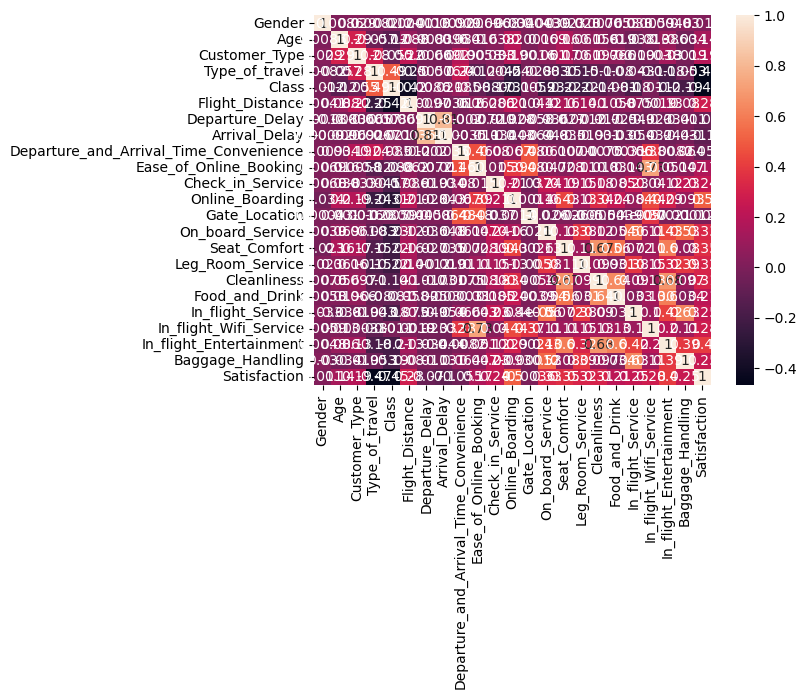

In [179]:
sns.heatmap(cor,annot=True)

# Model Building

In [180]:
# log
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [181]:
lg_p1=lg.predict(x1_te)
lg_p1

array([1, 0, 1, ..., 1, 0, 1])

In [182]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[8527, 1748],
       [2731, 9566]], dtype=int64)

In [183]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

80.15683147262095

In [184]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     10275
           1       0.85      0.78      0.81     12297

    accuracy                           0.80     22572
   macro avg       0.80      0.80      0.80     22572
weighted avg       0.81      0.80      0.80     22572



In [185]:
#tpr=tp/(tp+fn)
tpr8=8381/(8381+2877)
tpr8

0.7444483922543969

In [186]:
#fpr=fp/(fp+tn)
fpr8=1634/(1634+9680)
fpr8

0.1444228389605798

In [187]:
#precision=tp/(tp+fp)
precision8=8381/(8381+1634)
precision8

0.836844732900649

In [188]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score8=(2*(precision8*tpr8))/(precision8+tpr8)
f1score8

0.7879471630705588

In [189]:
#dt
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [190]:
dt_p1=dt.predict(x1_te)
dt_p1

array([1, 0, 1, ..., 0, 0, 1])

In [191]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[10542,   604],
       [  716, 10710]], dtype=int64)

In [192]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

94.15204678362574

In [193]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11146
           1       0.95      0.94      0.94     11426

    accuracy                           0.94     22572
   macro avg       0.94      0.94      0.94     22572
weighted avg       0.94      0.94      0.94     22572



In [194]:
#tpr=tp/(tp+fn)
tpr9=10571/(10571+687)
tpr9

0.9389767276603305

In [195]:
#fpr=fp/(fp+tn)
fpr9=627/(627+10687)
fpr9

0.05541806611278063

In [196]:
#precision=tp/(tp+fp)
precision9=10571/(10571+627)
precision9

0.944007858546169

In [197]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score9=(2*(precision9*tpr9))/(precision9+tpr9)
f1score9

0.9414855717848237

In [198]:
# rf
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [199]:
rf_p1=rf.predict(x1_te)
rf_p1

array([1, 0, 1, ..., 0, 0, 1])

In [200]:
rf_m1=confusion_matrix(rf_p1,y1_te)
rf_m1

array([[10935,   579],
       [  323, 10735]], dtype=int64)

In [201]:
rf_acc1=rf_m1.diagonal().sum()/rf_m1.sum()*100
rf_acc1

96.00389863547758

In [202]:
print(classification_report (rf_p1,y1_te))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11514
           1       0.95      0.97      0.96     11058

    accuracy                           0.96     22572
   macro avg       0.96      0.96      0.96     22572
weighted avg       0.96      0.96      0.96     22572



In [203]:
#tpr=tp/(tp+fn)
tpr10=10888/(10888+370)
tpr10

0.9671344821460295

In [204]:
#fpr=fp/(fp+tn)
fpr10=580/(580+10734)
fpr10

0.05126392080608096

In [205]:
#precision=tp/(tp+fp)
precision10=10888/(10888+580)
precision10

0.949424485524939

In [206]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score10=(2*(precision10*tpr10))/(precision10+tpr10)
f1score10

0.9581976590689079

In [207]:
# KNN
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=29)

In [208]:
knn_p1=knn.predict(x1_te)

In [209]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[8570, 3388],
       [2688, 7926]], dtype=int64)

In [210]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

73.08169413432572

In [211]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74     11958
           1       0.70      0.75      0.72     10614

    accuracy                           0.73     22572
   macro avg       0.73      0.73      0.73     22572
weighted avg       0.73      0.73      0.73     22572



In [212]:
#tpr=tp/(tp+fn)
tpr11=8356/(8356+2902)
tpr11

0.7422277491561556

In [213]:
#fpr=fp/(fp+tn)
fpr11=3365/(3365+7949)
fpr11

0.2974191267456249

In [214]:
#precision=tp/(tp+fp)
precision11=8356/(8356+3365)
precision11

0.7129084549099907

In [215]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score11=(2*(precision11*tpr11))/(precision11+tpr11)
f1score11

0.7272727272727274

In [216]:
# NB
nb.fit(x1_tr,y1_tr)

MultinomialNB()

In [217]:
nb_p1=nb.predict(x1_te)

In [218]:
nb_m1=confusion_matrix(nb_p1,y1_te)
nb_m1

array([[7001, 4619],
       [4257, 6695]], dtype=int64)

In [219]:
nb_acc1=nb_m1.diagonal().sum()/nb_m1.sum()*100
nb_acc1

60.67694488747121

In [220]:
print(classification_report(nb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     11620
           1       0.59      0.61      0.60     10952

    accuracy                           0.61     22572
   macro avg       0.61      0.61      0.61     22572
weighted avg       0.61      0.61      0.61     22572



In [221]:
#tpr=tp/(tp+fn)
tpr12=7016/(7016+4242)
tpr12

0.6232012790904246

In [222]:
#fpr=fp/(fp+tn)
fpr12=4626/(4626+6688)
fpr12

0.40887396146367333

In [223]:
#precision=tp/(tp+fp)
precision12=7016/(7016+4626)
precision12

0.6026455935406287

In [224]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score12=(2*(precision12*tpr12))/(precision12+tpr12)
f1score12

0.6127510917030566

In [225]:
#SVM
svc.fit(x1_tr,y1_tr)

SVC()

In [226]:
svc_p1=svc.predict(x1_te)

In [227]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[9085, 5751],
       [2173, 5563]], dtype=int64)

In [228]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

64.89455963140173

In [229]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70     14836
           1       0.49      0.72      0.58      7736

    accuracy                           0.65     22572
   macro avg       0.65      0.67      0.64     22572
weighted avg       0.70      0.65      0.66     22572



In [230]:
#tpr=tp/(tp+fn)
tpr13=8974/(8974+2284)
tpr13

0.7971220465446793

In [231]:
#fpr=fp/(fp+tn)
fpr13=5744/(5744+5570)
fpr13

0.5076895881209121

In [232]:
#precision=tp/(tp+fp)
precision13=8974/(8974+5744)
precision13

0.6097295828237532

In [233]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score13=(2*(precision13*tpr13))/(precision13+tpr13)
f1score13

0.6909454881429011

In [234]:
# ADABOOST
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [235]:
adbo_p1=adbo.predict(x1_te)

In [236]:
adbo_m1=confusion_matrix(adbo_p1,y1_te)
adbo_m1

array([[10574,   603],
       [  684, 10711]], dtype=int64)

In [237]:
adbo_acc1=adbo_m1.diagonal().sum()/adbo_m1.sum()*100
adbo_acc1

94.2982456140351

In [238]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     11177
           1       0.95      0.94      0.94     11395

    accuracy                           0.94     22572
   macro avg       0.94      0.94      0.94     22572
weighted avg       0.94      0.94      0.94     22572



In [239]:
#tpr=tp/(tp+fn)
tpr14=10566/(10566+692)
tpr14

0.9385325990406822

In [240]:
#fpr=fp/(fp+tn)
fpr14=612/(612+10702)
fpr14

0.05409227505745095

In [241]:
#precision=tp/(tp+fp)
precision14=10566/(10566+612)
precision14

0.9452495974235104

In [242]:
#f1score=(2*(precision*recall))/(precision+recall)
f1score14=(2*(precision14*tpr14))/(precision14+tpr14)
f1score14

0.9418791228382956

In [243]:
#XGBOOST
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [244]:
xgb_p1=xgb.predict(x1_te)

In [245]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[10911,   535],
       [  347, 10779]], dtype=int64)

In [246]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

96.09250398724083

In [247]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11446
           1       0.95      0.97      0.96     11126

    accuracy                           0.96     22572
   macro avg       0.96      0.96      0.96     22572
weighted avg       0.96      0.96      0.96     22572



In [248]:
#tpr=tp/(tp+fn)
tpr15=10917/(10917+341)
tpr15

0.9697104281399893

In [249]:
#fpr=fp/(fp+tn)
fpr15=541/(541+10773)
fpr15

0.047816864062223796

In [250]:
#precision=tp/(tp+fp)
precision15=10917/(10917+541)
precision15

0.9527840809914471

In [251]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score15=(2*(precision15*tpr15))/(precision15+tpr15)
f1score15

0.9611727416798731

# AUC-ROC Curve

In [354]:
roc2=roc_auc_score(xgb_p1,y1_te)
roc2

0.9610352862792025

In [355]:
fpr02,tpr02,threshold=roc_curve(y1_te,xgb_p1)

In [356]:
fpr02

array([0.        , 0.03082253, 1.        ])

In [357]:
tpr02

array([0.        , 0.95271345, 1.        ])

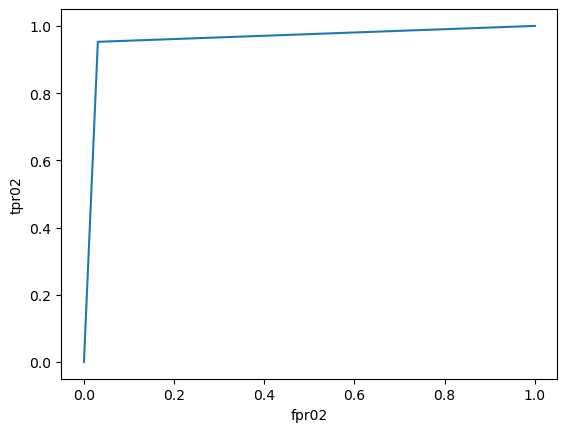

In [371]:
plt.xlabel("fpr02")
plt.ylabel("tpr02")
plt.plot(fpr02,tpr02)

In [254]:
# DF-2
l1=["log","dt","rf","knn","naive","svc","adaboost","xgboost"]
l2=[lg_acc1,dt_acc1,rf_acc1,knn_acc1,nb_acc1,svc_acc1,adbo_acc1,xgb_acc1]
l3=[fpr8,fpr9,fpr10,fpr11,fpr12,fpr13,fpr14,fpr15]
l4=[tpr8,tpr9,tpr10,tpr11,tpr12,tpr13,tpr14,tpr15]
l5=[f1score8,f1score9,f1score10,f1score11,f1score12,f1score13,f1score14,f1score15]

In [255]:
final2=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final2

,Model_Name,accuracy,fpr,tpr,f1score
0,log,80.156831,0.144423,0.744448,0.787947
1,dt,94.152047,0.055418,0.938977,0.941486
2,rf,96.003899,0.051264,0.967134,0.958198
3,knn,73.081694,0.297419,0.742228,0.727273
4,naive,60.676945,0.408874,0.623201,0.612751
5,svc,64.894560,0.507690,0.797122,0.690945
6,adaboost,94.298246,0.054092,0.938533,0.941879
7,xgboost,96.092504,0.047817,0.969710,0.961173


# Feature Selection

# Recursive Feature Elimination (RFE)

In [257]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [258]:
rfe=RFE(dTree)

In [259]:
rfe.fit(air0_1.iloc[:,:-1],air0_1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [260]:
rfe.support_

array([False,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True])

In [261]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(air0_1.iloc[:,:-1].columns)})
rfe_df

,Importances,Columns
0,False,Gender
1,True,Age
2,True,Customer_Type
3,True,Type_of_travel
4,True,Class
5,True,Flight_Distance
6,False,Departure_Delay
7,False,Arrival_Delay
8,False,Departure_and_Arrival_Time_Convenience
9,False,Ease_of_Online_Booking


In [262]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
11,True,Online_Boarding
10,True,Check_in_Service
20,True,In_flight_Entertainment
19,True,In_flight_Wifi_Service
12,True,Gate_Location
1,True,Age
21,True,Baggage_Handling
5,True,Flight_Distance
4,True,Class
3,True,Type_of_travel


In [263]:
air0_1.columns

Index(['Gender', 'Age', 'Customer_Type', 'Type_of_travel', 'Class',
       'Flight_Distance', 'Departure_Delay', 'Arrival_Delay',
       'Departure_and_Arrival_Time_Convenience', 'Ease_of_Online_Booking',
       'Check_in_Service', 'Online_Boarding', 'Gate_Location',
       'On_board_Service', 'Seat_Comfort', 'Leg_Room_Service', 'Cleanliness',
       'Food_and_Drink', 'In_flight_Service', 'In_flight_Wifi_Service',
       'In_flight_Entertainment', 'Baggage_Handling', 'Satisfaction'],
      dtype='object')

In [264]:
ax=air0_1.drop(["Gender","Departure_Delay","Arrival_Delay","Departure_and_Arrival_Time_Convenience","Ease_of_Online_Booking","On_board_Service","Seat_Comfort","Leg_Room_Service","Cleanliness","Food_and_Drink","In_flight_Service"],axis=1)

In [265]:
ax.head(1)

,Age,Customer_Type,Type_of_travel,Class,Flight_Distance,Check_in_Service,Online_Boarding,Gate_Location,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling,Satisfaction
121554,55,1,0,1,30.199338,4,4,5,3,4,3,0


# Model Building

In [266]:
x3=ax.iloc[:,:-1]
y3=ax.iloc[:,-1]

In [267]:
x3.head(1)
#y3.head(1)

,Age,Customer_Type,Type_of_travel,Class,Flight_Distance,Check_in_Service,Online_Boarding,Gate_Location,In_flight_Wifi_Service,In_flight_Entertainment,Baggage_Handling
121554,55,1,0,1,30.199338,4,4,5,3,4,3


In [268]:
x3_tr,x3_te,y3_tr,y3_te=train_test_split(x3,y3,test_size=0.2,random_state=100)

In [269]:
x3_tr.shape,x3_te.shape,y3_tr.shape,y3_te.shape

((90284, 11), (22572, 11), (90284,), (22572,))

In [270]:
lg.fit(x3_tr,y3_tr)

LogisticRegression()

In [271]:
lg_p3=lg.predict(x3_te)
lg_p3

array([1, 0, 1, ..., 0, 1, 1])

In [272]:
lg_m3=confusion_matrix(lg_p3,y3_te)
lg_m3

array([[9458, 1600],
       [1800, 9714]], dtype=int64)

In [273]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

84.9370902002481

In [274]:
print(classification_report(lg_p3,y3_te))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     11058
           1       0.86      0.84      0.85     11514

    accuracy                           0.85     22572
   macro avg       0.85      0.85      0.85     22572
weighted avg       0.85      0.85      0.85     22572



In [275]:
#tpr=tp/(tp+fn)
tpr24=9634/(9634+1624)
tpr24

0.8557470243382483

In [276]:
#fpr=fp/(fp+tn)
fpr24=1615/(1615+9699)
fpr24

0.14274350362382887

In [277]:
#precision=tp/(tp+fp)
precision24=9634/(9634+1615)
precision24

0.8564316828162504

In [278]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score24=(2*(precision24*tpr24))/(precision24+tpr24)
f1score24

0.8560892166881414

In [279]:
#dt
dt.fit(x3_tr,y3_tr)

DecisionTreeClassifier()

In [280]:
dt_p3=dt.predict(x3_te)
dt_p3

array([1, 0, 1, ..., 1, 0, 1])

In [281]:
dt_m3=confusion_matrix(dt_p3,y3_te)
dt_m3

array([[10463,   693],
       [  795, 10621]], dtype=int64)

In [282]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

93.40776182881446

In [283]:
print(classification_report(dt_p3,y3_te))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11156
           1       0.94      0.93      0.93     11416

    accuracy                           0.93     22572
   macro avg       0.93      0.93      0.93     22572
weighted avg       0.93      0.93      0.93     22572



In [284]:
#tpr=tp/(tp+fn)
tpr25=10488/(10488+770)
tpr25

0.9316041925741695

In [285]:
#fpr=fp/(fp+tn)
fpr25=697/(697+10617)
fpr25

0.061605091037652465

In [286]:
#precision=tp/(tp+fp)
precision25=10488/(10488+697)
precision25

0.9376843987483237

In [287]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score25=(2*(precision25*tpr25))/(precision25+tpr25)
f1score25

0.9346344071648175

In [288]:
# rf
rf.fit(x3_tr,y3_tr)

RandomForestClassifier()

In [289]:
rf_p3=rf.predict(x3_te)
rf_p3

array([1, 0, 1, ..., 0, 0, 1])

In [290]:
rf_m3=confusion_matrix(rf_p3,y3_te)
rf_m3

array([[10850,   673],
       [  408, 10641]], dtype=int64)

In [291]:
rf_acc3=rf_m3.diagonal().sum()/rf_m3.sum()*100
rf_acc3

95.21088073719652

In [292]:
print(classification_report(rf_p3,y3_te))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11523
           1       0.94      0.96      0.95     11049

    accuracy                           0.95     22572
   macro avg       0.95      0.95      0.95     22572
weighted avg       0.95      0.95      0.95     22572



In [293]:
#tpr=tp/(tp+fn)
tpr26=10863/(10863+395)
tpr26

0.9649138390477883

In [294]:
#fpr=fp/(fp+tn)
fpr26=668/(668+10646)
fpr26

0.05904189499734842

In [295]:
#precision=tp/(tp+fp)
precision26=10863/(10863+668)
precision26

0.9420692047524065

In [296]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score26=(2*(precision26*tpr26))/(precision26+tpr26)
f1score26

0.9533546886655843

In [297]:
#KNN
knn.fit(x3_tr,y3_tr)

KNeighborsClassifier(n_neighbors=29)

In [298]:
knn_p3=knn.predict(x3_te)
knn_p3

array([1, 0, 1, ..., 0, 0, 1])

In [299]:
knn_m3=confusion_matrix(knn_p3,y3_te)
knn_m3

array([[10084,  1792],
       [ 1174,  9522]], dtype=int64)

In [300]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

86.85982633351055

In [301]:
print(classification_report(knn_p3,y3_te))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     11876
           1       0.84      0.89      0.87     10696

    accuracy                           0.87     22572
   macro avg       0.87      0.87      0.87     22572
weighted avg       0.87      0.87      0.87     22572



In [302]:
#tpr=tp/(tp+fn)
tpr27=10101/(10101+1157)
tpr27

0.8972286374133949

In [303]:
#fpr=fp/(fp+tn)
fpr27=1786/(1786+9528)
fpr27

0.15785752165458725

In [304]:
#precision=tp/(tp+fp)
precision27=10101/(10101+1786)
precision27

0.8497518297299571

In [305]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score27=(2*(precision27*tpr27))/(precision27+tpr27)
f1score27

0.872845106934543

In [306]:
# NB
nb.fit(x3_tr,y3_tr)

MultinomialNB()

In [307]:
nb_p3=nb.predict(x3_te)

In [308]:
nb_m3=confusion_matrix(nb_p3,y3_te)
nb_m3

array([[8197, 2994],
       [3061, 8320]], dtype=int64)

In [309]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

73.17472975367713

In [310]:
print(classification_report(nb_p3,y3_te))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     11191
           1       0.74      0.73      0.73     11381

    accuracy                           0.73     22572
   macro avg       0.73      0.73      0.73     22572
weighted avg       0.73      0.73      0.73     22572



In [311]:
#tpr=tp/(tp+fn)
tpr28=8241/(8241+3017)
tpr28

0.7320127909042459

In [312]:
#fpr=fp/(fp+tn)
fpr28=2996/(2996+8318)
fpr28

0.26480466678451475

In [313]:
#precision=tp/(tp+fp)
precision28=8241/(8241+2996)
precision28

0.7333807955860105

In [314]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score28=(2*(precision28*tpr28))/(precision28+tpr28)
f1score28

0.7326961547010447

In [315]:
#SVM
svc.fit(x3_tr,y3_tr)

SVC()

In [316]:
svc_p3=svc.predict(x3_te)

In [317]:
svc_m3=confusion_matrix(svc_p3,y3_te)
svc_m3

array([[10069,  1681],
       [ 1189,  9633]], dtype=int64)

In [318]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

87.28513202197414

In [319]:
print(classification_report(svc_p3,y3_te))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     11750
           1       0.85      0.89      0.87     10822

    accuracy                           0.87     22572
   macro avg       0.87      0.87      0.87     22572
weighted avg       0.87      0.87      0.87     22572



In [320]:
#tpr=tp/(tp+fn)
tpr29=10087/(10087+1171)
tpr29

0.8959850772783798

In [321]:
#fpr=fp/(fp+tn)
fpr29=1690/(1690+9624)
fpr29

0.1493724589004773

In [322]:
#precision=tp/(tp+fp)
precision29=10087/(10087+1690)
precision29

0.8564999575443661

In [323]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score29=(2*(precision29*tpr29))/(precision29+tpr29)
f1score29

0.8757976991534621

In [324]:
# ADABOOST
adbo.fit(x3_tr,y3_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [325]:
adbo_p3=adbo.predict(x3_te)

In [326]:
adbo_m3=confusion_matrix(adbo_p3,y3_te)
adbo_m3

array([[10475,   690],
       [  783, 10624]], dtype=int64)

In [327]:
adbo_acc3=adbo_m3.diagonal().sum()/adbo_m3.sum()*100
adbo_acc3

93.4742158426369

In [328]:
print(classification_report(adbo_p3,y3_te))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11165
           1       0.94      0.93      0.94     11407

    accuracy                           0.93     22572
   macro avg       0.93      0.93      0.93     22572
weighted avg       0.93      0.93      0.93     22572



In [329]:
#tpr=tp/(tp+fn)
tpr30=10495/(10495+763)
tpr30

0.9322259726416771

In [330]:
#fpr=fp/(fp+tn)
fpr30=708/(708+10606)
fpr30

0.0625773378115609

In [331]:
#precision=tp/(tp+fp)
precision30=10495/(10495+708)
precision30

0.9368026421494242

In [332]:
#f1score=(2*(precision*recall))/(precision+recall)
f1score30=(2*(precision30*tpr30))/(precision30+tpr30)
f1score30

0.9345087039757802

In [333]:
# XGBOOST
xgb.fit(x3_tr,y3_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [334]:
xgb_p3=xgb.predict(x3_te)

In [335]:
xgb_m3=confusion_matrix(xgb_p3,y3_te)
xgb_m3

array([[10850,   622],
       [  408, 10692]], dtype=int64)

In [336]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

95.4368243841928

In [337]:
print(classification_report(xgb_p3,y3_te))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11472
           1       0.95      0.96      0.95     11100

    accuracy                           0.95     22572
   macro avg       0.95      0.95      0.95     22572
weighted avg       0.95      0.95      0.95     22572



In [338]:
#tpr=tp/(tp+fn)
tpr31=10855/(10855+403)
tpr31

0.964203233256351

In [339]:
#fpr=fp/(fp+tn)
fpr31=624/(624+10690)
fpr31

0.05515290790171469

In [340]:
#precision=tp/(tp+fp)
precision31=10855/(10855+624)
precision31

0.9456398640996603

In [341]:
#f1 score=(2*(precision*recall))/(precision+recall)
f1score31=(2*(precision31*tpr31))/(precision31+tpr31)
f1score31

0.9548313321898227

# AUC-ROC Curve

In [359]:
roc3=roc_auc_score(xgb_p3,y3_te)
roc3

0.9545121376606732

In [364]:
fpr03,tpr03,threshold=roc_curve(y3_te,xgb_p3)

In [365]:
fpr03

array([0.       , 0.0362409, 1.       ])

In [366]:
tpr03

array([0.        , 0.94502386, 1.        ])

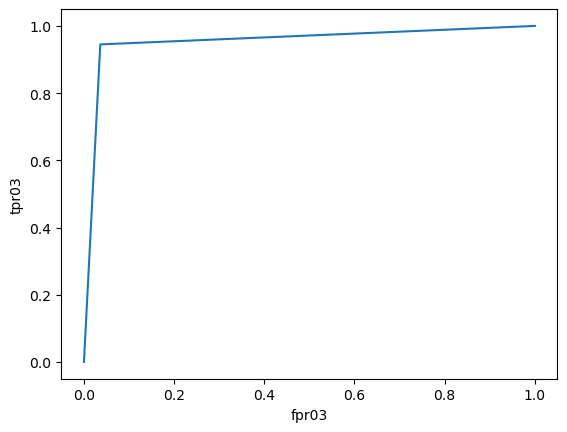

In [372]:
plt.xlabel("fpr03")
plt.ylabel("tpr03")
plt.plot(fpr03,tpr03)

In [344]:
# DF-4
l1=["log","dt","rf","knn","naive","svc","adaboost","xgboost"]
l2=[lg_acc3,dt_acc3,rf_acc3,knn_acc3,nb_acc3,svc_acc3,adbo_acc3,xgb_acc3]
l3=[fpr24,fpr25,fpr26,fpr27,fpr28,fpr29,fpr30,fpr31]
l4=[tpr24,tpr25,tpr26,tpr27,tpr28,tpr29,tpr30,tpr31]
l5=[f1score24,f1score25,f1score26,f1score27,f1score28,f1score29,f1score30,f1score31]

In [345]:
final4=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final4

,Model_Name,accuracy,fpr,tpr,f1score
0,log,84.937090,0.142744,0.855747,0.856089
1,dt,93.407762,0.061605,0.931604,0.934634
2,rf,95.210881,0.059042,0.964914,0.953355
3,knn,86.859826,0.157858,0.897229,0.872845
4,naive,73.174730,0.264805,0.732013,0.732696
5,svc,87.285132,0.149372,0.895985,0.875798
6,adaboost,93.474216,0.062577,0.932226,0.934509
7,xgboost,95.436824,0.055153,0.964203,0.954831
